In [27]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [34]:
def benchmark(mst_kernel, n_vals):
    times = []

    for n in tqdm(n_vals):
        connectivity = 5

        g = generate_graph(n, connectivity)
        E = convert_to_edgelist(g)
        T = pd.DataFrame(dtype=int)
        P = UnionFind(len(E))

        start_time = time()
        E, MST_kruskal, P = mst_kernel(E, T, P)
        end_time = time()

        times.append(float(end_time - start_time))
    return times

n_vals = np.linspace(100, 1000, 10, dtype=int)
kruskal_times = benchmark(kruskal, n_vals)
filter_kruskal_times = benchmark(filter_kruskal, n_vals)


100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


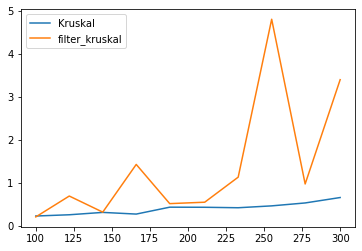

In [35]:
plt.plot(n_vals, kruskal_times, label="Kruskal")
plt.plot(n_vals, filter_kruskal_times, label="filter_kruskal")
plt.legend()